In [1]:
import keras 
from  keras.datasets import mnist
import numpy as NP
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = mnist.load_data()


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X_TRAIN = NP.reshape(X_TRAIN,(60000,784))
X_TEST = NP.reshape(X_TEST,(10000,784))
X_TRAIN = X_TRAIN/255
X_TEST = X_TEST/255
print("Shape of Train Data: {}".format(X_TRAIN.shape))
print("Shape of Train Data: {}".format(X_TEST.shape))

Shape of Train Data: (60000, 784)
Shape of Train Data: (10000, 784)


In [3]:
encoding_dim = 32 
from keras.models import Model
from keras.layers import Input, Dense

input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
encoding_dim = 32 
from keras.models import Model
from keras.layers import Input, Dense

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [4]:
 #this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(X_TRAIN,X_TRAIN,epochs=50,batch_size=128,shuffle=True,
                validation_data=(X_TEST,X_TEST))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 188us/step - loss: 0.1607 - val_loss: 0.1552
Epoch 2/50
60000/60000 [==============================] - 8s 137us/step - loss: 0.1530 - val_loss: 0.1482
Epoch 3/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.1466 - val_loss: 0.1421
Epoch 4/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.1411 - val_loss: 0.1370
Epoch 5/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.1363 - val_loss: 0.1325: 
Epoch 6/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.1321 - val_loss: 0.1285
Epoch 7/50
60000/60000 [==============================] - 8s 140us/step - loss: 0.1283 - val_loss: 0.1249
Epoch 8/50
60000/60000 [==============================] - 8s 128us/step - loss: 0.1249 - val_loss: 0.1217
Epoch 9/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.1218 - val_loss: 

In [11]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(X_TRAIN,X_TRAIN,epochs=5,batch_size=128,shuffle=True,
                validation_data=(X_TEST,X_TEST))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.0972 - val_loss: 0.0956
Epoch 2/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.0970 - val_loss: 0.0955
Epoch 3/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.0970 - val_loss: 0.0954
Epoch 4/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.0969 - val_loss: 0.0953
Epoch 5/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.0968 - val_loss: 0.0952


In [8]:

encoded_imgs = autoencoder.predict(X_TEST)

TEST DATA AS INPUT:


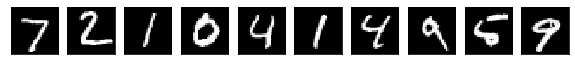

Reconstructed Image:


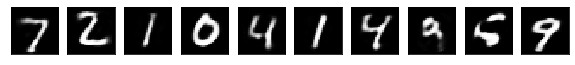

In [17]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Reconstructed Image:")

plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

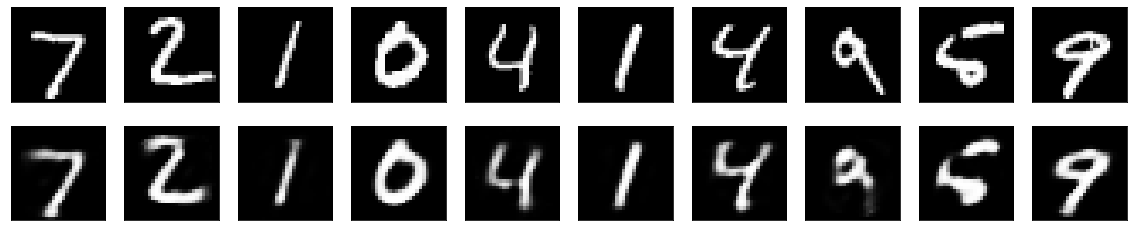

In [10]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
encoding_dim = 32  
from keras.models import Model
from keras.layers import Input, Dense
input_img = Input(shape=(784,))


encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)



In [24]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [25]:
autoencoder.fit(X_TRAIN,X_TRAIN,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_TEST,X_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 207us/step - loss: 0.2014 - val_loss: 0.1382
Epoch 2/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.1274 - val_loss: 0.1169
Epoch 3/50
60000/60000 [==============================] - 8s 141us/step - loss: 0.1132 - val_loss: 0.1079
Epoch 4/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1066 - val_loss: 0.1029
Epoch 5/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.1025 - val_loss: 0.0995
Epoch 6/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.0993 - val_loss: 0.0969
Epoch 7/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.0968 - val_loss: 0.0947
Epoch 8/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.0948 - val_loss: 0.0933
Epoch 9/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.0934 - val_loss: 0.

TEST DATA AS INPUT:


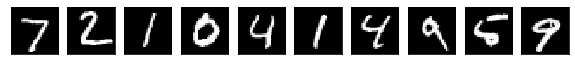

Reconstructed Image:


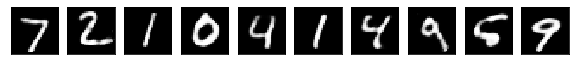

In [27]:
import matplotlib.pyplot as plt
encoded_imgs = autoencoder.predict(X_TEST)
n = 10  # how many digits we will display
print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Reconstructed Image:")

plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

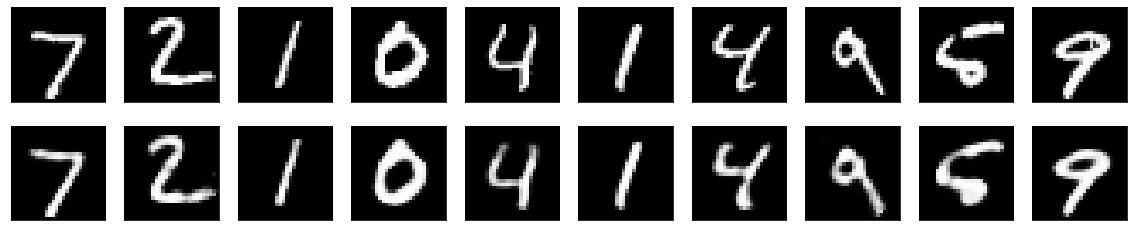

In [26]:
import matplotlib.pyplot as plt

encoded_imgs = autoencoder.predict(X_TEST)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolution Autoencoder for image denoising

In [0]:
x_train = NP.reshape(X_TRAIN, (len(X_TRAIN), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = NP.reshape(X_TEST, (len(X_TEST), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * NP.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * NP.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = NP.clip(x_train_noisy, 0., 1.)
x_test_noisy = NP.clip(x_test_noisy, 0., 1.)

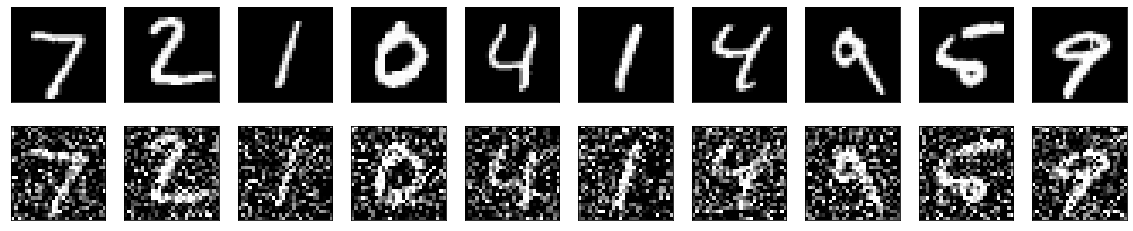

In [0]:
import matplotlib.pyplot as plt

#x_train_noisy = NP.clip(x_train_noisy, 0., 1.)
#x_test_noisy = NP.clip(x_test_noisy, 0., 1.)
#encoded_imgs = autoencoder.predict(X_TEST)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K


In [0]:
input_img = Input(shape=(28, 28, 1))  

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
#Let's train it for 100 epochs:

autoencoder.fit(x_train_noisy,x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy,x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 191us/step - loss: 0.1883 - val_loss: 0.1256
Epoch 2/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.1208 - val_loss: 0.1153
Epoch 3/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.1135 - val_loss: 0.1156
Epoch 4/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.1095 - val_loss: 0.1073
Epoch 5/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.1069 - val_loss: 0.1038
Epoch 6/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.1051 - val_loss: 0.1029
Epoch 7/100
60000/60000 [==============================] - 8s 125us/step - loss: 0.1039 - val_loss: 0.1021
Epoch 8/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.1030 - val_loss: 0.1010
Epoch 9/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.1021 - val

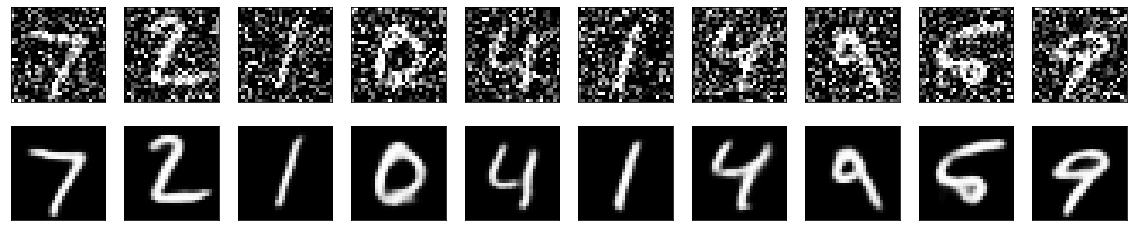

In [0]:
import matplotlib.pyplot as plt

#x_train_noisy = NP.clip(x_train_noisy, 0., 1.)
#x_test_noisy = NP.clip(x_test_noisy, 0., 1.)
encoded_imgs = autoencoder.predict(x_test_noisy)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA(32)
pca.fit(X_TRAIN)
TRAIN= pca.transform(X_TRAIN)
TEST = pca.transform(X_TEST)
approximation = pca.inverse_transform(TEST)

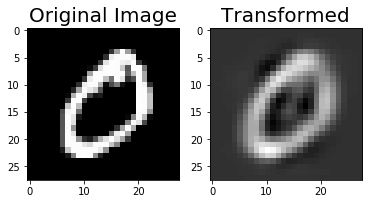

In [0]:
#plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X_TRAIN[1].reshape(28,28))
#plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28))
#plt.xlabel('154 components', fontsize = 14)
plt.title('Transformed', fontsize = 20);



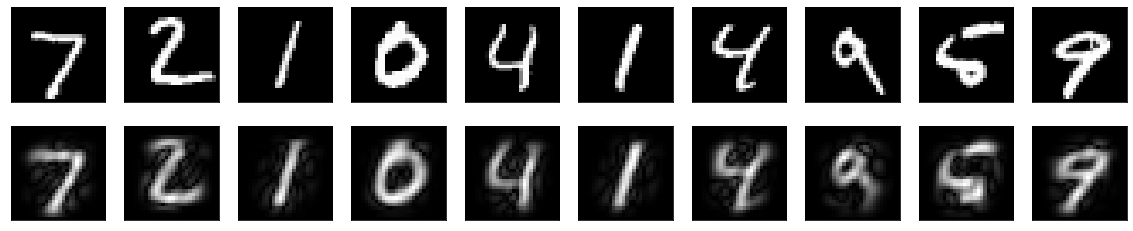

In [42]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(NP.abs(approximation[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [43]:
pca = PCA(128)
pca.fit(X_TRAIN)
TRAIN= pca.transform(X_TRAIN)
TEST = pca.transform(X_TEST)
approximation_TRAIN = pca.inverse_transform(TRAIN)
approximation_TEST = pca.inverse_transform(TEST)
#approximation_TRAIN=approximation/NP.max(approximation_TRAIN)
#approximation_TEST=approximation/NP.max(approximation_TEST)

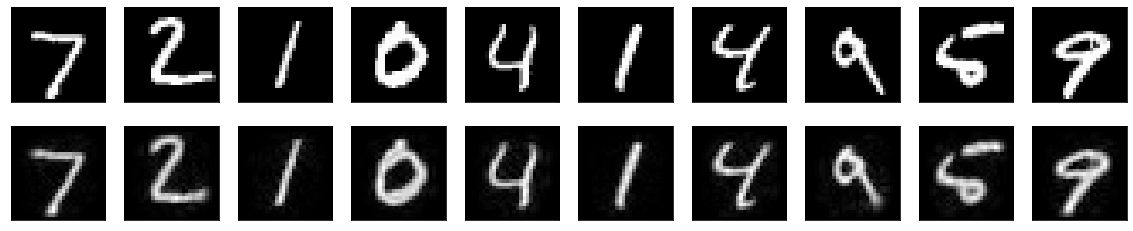

In [46]:
import matplotlib.pyplot as plt

#encoded_imgs = autoencoder.predict(X_TEST)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(NP.abs(approximation_TEST[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

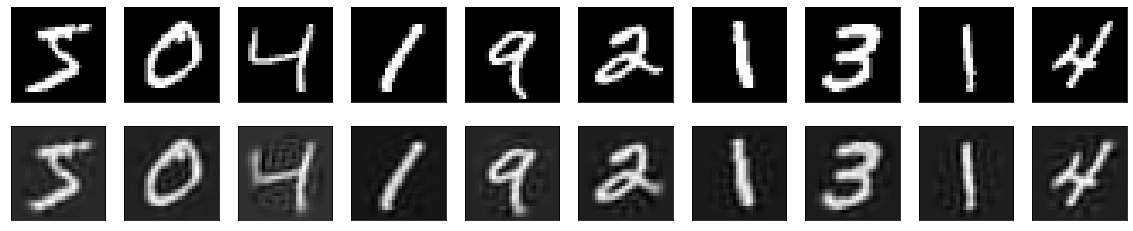

In [0]:
pca = PCA(128)
pca.fit(X_TRAIN)
TRAIN= pca.transform(X_TRAIN)
TEST = pca.transform(X_TEST)
approximation_TRAIN = pca.inverse_transform(TRAIN)
approximation_TEST = pca.inverse_transform(TEST)
#approximation_TRAIN=approximation/NP.max(approximation_TRAIN)
#approximation_TEST=approximation/NP.max(approximation_TEST)


import matplotlib.pyplot as plt

#encoded_imgs = autoencoder.predict(X_TEST)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TRAIN[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(NP.abs(approximation_TRAIN[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

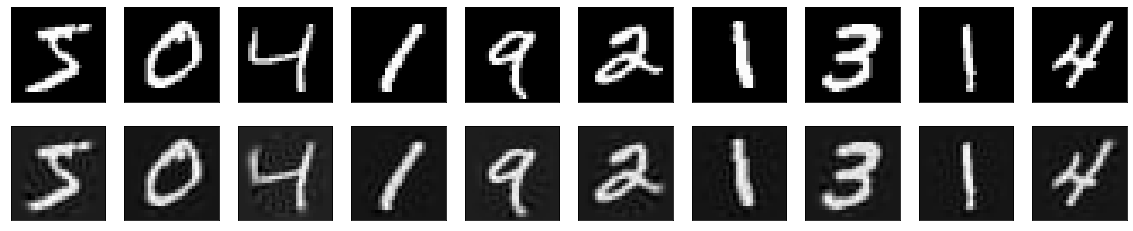

In [0]:
pca = PCA(200)
pca.fit(X_TRAIN)
TRAIN= pca.transform(X_TRAIN)
TEST = pca.transform(X_TEST)
approximation_TRAIN = pca.inverse_transform(TRAIN)
approximation_TEST = pca.inverse_transform(TEST)
#approximation_TRAIN=approximation/NP.max(approximation_TRAIN)
#approximation_TEST=approximation/NP.max(approximation_TEST)


import matplotlib.pyplot as plt

#encoded_imgs = autoencoder.predict(X_TEST)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TRAIN[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(approximation_TRAIN[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()